In [1]:
import os
os.chdir('..')

In [2]:
from wisdom_tree import split_data, C45, plot_confusion_matrix, calculate_metrics
from nb_utils import display_side_by_side, print_metrics_report
import pandas as pd

In [3]:
train_data = pd.read_csv('data/titanic/train.csv', sep=',')
X_test = pd.read_csv('data/titanic/test.csv', sep=',')
truth = pd.read_csv('data/titanic/truth.csv', sep=',')

age_median = train_data['Age'].median()
fare_median = train_data['Fare'].median()
embarked_mode = train_data['Embarked'].mode()[0]

train_data['Age'] = train_data['Age'].fillna(age_median)
X_test['Age'] = X_test['Age'].fillna(age_median)

train_data['Fare'] = train_data['Fare'].fillna(fare_median)
X_test['Fare'] = X_test['Fare'].fillna(fare_median)

train_data['Embarked'] = train_data['Embarked'].fillna(embarked_mode)
X_test['Embarked'] = X_test['Embarked'].fillna(embarked_mode)

cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_data.drop(cols_to_drop, axis='columns', inplace=True)
X_test.drop(cols_to_drop, axis='columns', inplace=True)

y_test = truth['Survived'].astype(int)

train_data = train_data[[col for col in train_data.columns if col != 'Survived'] + ['Survived']]

In [4]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

display_side_by_side(X_train, y_train, names=['X', 'y'])
display_side_by_side(X_test, y_test, names=['X', 'y'])

In [5]:
arvere = C45().fit(X_train, y_train)
arvere.plot()

Split(Sex), samples=891, samples_values=(549, 342)
├── female: Split(SibSp, 4.5), samples=314, samples_values=(81, 233)
│   ├── <= 4.5: Split(Parch, 5.5), samples=310, samples_values=(77, 233)
│   │   ├── <= 5.5: Split(Fare, 6.9875), samples=309, samples_values=(76, 233)
│   │   │   ├── <= 6.9875: Predict(0), samples=1, samples_values=(1, 0)
│   │   │   └── > 6.9875: Split(Pclass, 2.5), samples=308, samples_values=(75, 233)
│   │   │       ├── <= 2.5: Split(Age, 2.5), samples=170, samples_values=(9, 161)
│   │   │       │   ├── <= 2.5: Split(Pclass, 1.5), samples=2, samples_values=(1, 1)
│   │   │       │   │   ├── <= 1.5: Predict(0), samples=1, samples_values=(1, 0)
│   │   │       │   │   └── > 1.5: Predict(1), samples=1, samples_values=(0, 1)
│   │   │       │   └── > 2.5: Split(Fare, 28.85625), samples=168, samples_values=(8, 160)
│   │   │       │       ├── <= 28.85625: Split(Fare, 28.23125), samples=69, samples_values=(7, 62)
│   │   │       │       │   ├── <= 28.23125: Split(Age

In [6]:
predictions = arvere.predict(X_test)
predictions

[np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.in

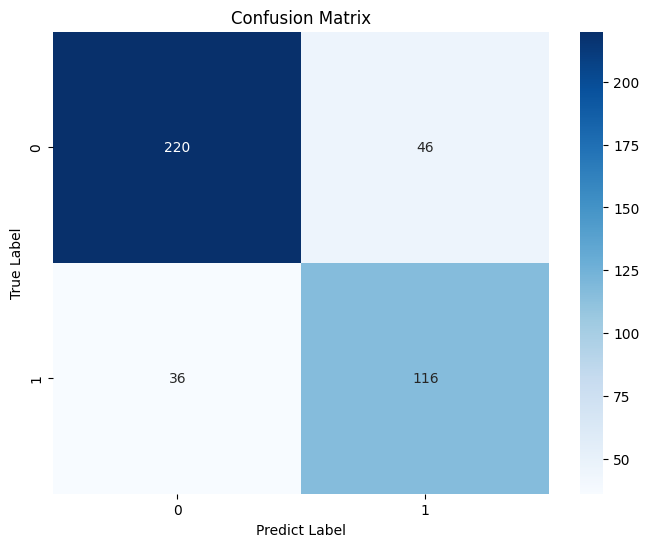

         Classification Report
Overall Accuracy: 0.8038

Class           Precision    Recall       F1-Score    
---------------------------------------------
0               0.8594       0.8271       0.8429      
1               0.7160       0.7632       0.7389      
---------------------------------------------
Macro Average   0.7877       0.7951       0.7909      


In [7]:
plot_confusion_matrix(y_test, predictions)
metrics = calculate_metrics(y_test, predictions)
print_metrics_report(metrics)